# Upload and clean data part 1: Data Wrangling(Merging Tables)

## FARA

### Load & Inspect Raw Data

In [ ]:
#Load raw data FARA
import pandas as pd
RawFARA3 = pd.read_csv(r"Data\FARA.csv")
RawFARA3

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,3326,1317,0,57.0,1.71,0,...,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0
72527,56043000301,Wyoming,Washakie County,1,2665,1154,0,10.0,0.38,0,...,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0
72528,56043000302,Wyoming,Washakie County,1,2542,1021,0,73.0,2.87,0,...,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0
72529,56045951100,Wyoming,Weston County,0,3314,1322,0,252.0,7.60,0,...,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0


In [53]:
RawFARA3[["State", "County", "Pop2010", 
"LAPOP1_10",
    "LALOWI1_10",
    "TractLOWI",
    "TractHUNV",
    ]]

,State,County,Pop2010,LAPOP1_10,LALOWI1_10,TractLOWI,TractHUNV
0,Alabama,Autauga County,1912,1896.0,461.0,455.0,6.0
1,Alabama,Autauga County,2170,1261.0,604.0,802.0,89.0
2,Alabama,Autauga County,3373,1552.0,478.0,1306.0,99.0
3,Alabama,Autauga County,4386,1363.0,343.0,922.0,21.0
4,Alabama,Autauga County,10766,2643.0,586.0,2242.0,230.0
...,...,...,...,...,...,...,...
72526,Wyoming,Washakie County,3326,902.0,218.0,765.0,61.0
72527,Wyoming,Washakie County,2665,NaN,NaN,774.0,88.0
72528,Wyoming,Washakie County,2542,155.0,44.0,789.0,23.0
72529,Wyoming,Weston County,3314,840.0,247.0,955.0,47.0


In [26]:
FARA3.columns

Index(['Tract_ID', 'State', 'County', 'Urban_Status', 'Is_Food_Desert',
       'Total_Population', 'LowAccess_Pop', 'LowIncome_Access_Pop',
       'LowIncome_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate',
       'Median_Income'],
      dtype='object')

In [ ]:
# Initial review of the data 
print(f"Shape: {FARA3.shape}")
print("\nFirst 3 rows:")
display(FARA3.head(3))
print("\nColumn names:")
print(FARA3.columns.tolist())
FARA3.columns

Shape: (72531, 13)

First 3 rows:


,State,County,CensusTract,Urban,Pop2010,LILATracts_1And10,LAPOP1_10,LALOWI1_10,TractLOWI,TractHUNV,TractSNAP,PovertyRate,MedianFamilyIncome
0,Alabama,Autauga County,1001020100,1,1912,0,1896.0,461.0,455.0,6.0,102.0,11.3,81250.0
1,Alabama,Autauga County,1001020200,1,2170,1,1261.0,604.0,802.0,89.0,156.0,17.9,49000.0
2,Alabama,Autauga County,1001020300,1,3373,0,1552.0,478.0,1306.0,99.0,172.0,15.0,62609.0



Column names:
['State', 'County', 'CensusTract', 'Urban', 'Pop2010', 'LILATracts_1And10', 'LAPOP1_10', 'LALOWI1_10', 'TractLOWI', 'TractHUNV', 'TractSNAP', 'PovertyRate', 'MedianFamilyIncome']


Index(['State', 'County', 'CensusTract', 'Urban', 'Pop2010',
       'LILATracts_1And10', 'LAPOP1_10', 'LALOWI1_10', 'TractLOWI',
       'TractHUNV', 'TractSNAP', 'PovertyRate', 'MedianFamilyIncome'],
      dtype='object')

In [55]:
# This is number of counties in the dataset
state_couny_combo = FARA3[['State', 'County']].drop_duplicates()
print(f"count: {len(state_couny_combo)}")

count: 3142


### Select & Rename Key Variables

In [57]:
selected_cols = [ "State", "County", "CensusTract", "Urban","Pop2010", "LILATracts_1And10", "LAPOP1_10", "LALOWI1_10", "TractLOWI", 
                 "TractHUNV", "TractSNAP", "PovertyRate", "MedianFamilyIncome"]
FARA3 = RawFARA3[selected_cols]

# Keep only selected columns
FARA3.shape

(72531, 13)

In [58]:
# Rename colunms 
FARA3 = FARA3.rename(columns={
    # Core identifiers
    "CensusTract": "Tract_ID",
    "Urban": "Urban_Status",  # 1=Urban, 0=Rural
    "Pop2010": "Total_Population",
    
    # Food desert flag
    "LILATracts_1And10": "Is_Food_Desert",  # 1=Yes, 0=No
    
    # Raw counts for ratios
    "LAPOP1_10": "LowAccess_Pop",
    "LALOWI1_10": "LowIncome&_LowAccess_Pop",
    "TractLOWI": "LowIncome_Pop",
    "TractHUNV": "NoVehicle_HHs",
    "TractSNAP": "SNAP_HHs",
    
    # Socioeconomic
    "PovertyRate": "Poverty_Rate",
    "MedianFamilyIncome": "Median_Income"
})

# Select and rename

print(FARA3.columns.tolist())
FARA3.shape

['State', 'County', 'Tract_ID', 'Urban_Status', 'Total_Population', 'Is_Food_Desert', 'LowAccess_Pop', 'LowIncome&_LowAccess_Pop', 'LowIncome_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate', 'Median_Income']


(72531, 13)

In [59]:
print(FARA3.columns.tolist())
FARA3.shape

['State', 'County', 'Tract_ID', 'Urban_Status', 'Total_Population', 'Is_Food_Desert', 'LowAccess_Pop', 'LowIncome&_LowAccess_Pop', 'LowIncome_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate', 'Median_Income']


(72531, 13)

In [60]:
FARA3 = FARA3[['Tract_ID', 'State', 'County',
               'Urban_Status', 'Is_Food_Desert',
               'Total_Population', 'LowAccess_Pop', 'LowIncome&_LowAccess_Pop', 'LowIncome_Pop', 
               'NoVehicle_HHs', 'SNAP_HHs',
               'Poverty_Rate', 'Median_Income']
]
FARA3

,Tract_ID,State,County,Urban_Status,Is_Food_Desert,Total_Population,LowAccess_Pop,LowIncome&_LowAccess_Pop,LowIncome_Pop,NoVehicle_HHs,SNAP_HHs,Poverty_Rate,Median_Income
0,1001020100,Alabama,Autauga County,1,0,1912,1896.0,461.0,455.0,6.0,102.0,11.3,81250.0
1,1001020200,Alabama,Autauga County,1,1,2170,1261.0,604.0,802.0,89.0,156.0,17.9,49000.0
2,1001020300,Alabama,Autauga County,1,0,3373,1552.0,478.0,1306.0,99.0,172.0,15.0,62609.0
3,1001020400,Alabama,Autauga County,1,0,4386,1363.0,343.0,922.0,21.0,98.0,2.8,70607.0
4,1001020500,Alabama,Autauga County,1,0,10766,2643.0,586.0,2242.0,230.0,339.0,15.2,96334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,0,3326,902.0,218.0,765.0,61.0,64.0,9.7,67254.0
72527,56043000301,Wyoming,Washakie County,1,0,2665,NaN,NaN,774.0,88.0,41.0,11.6,64152.0
72528,56043000302,Wyoming,Washakie County,1,0,2542,155.0,44.0,789.0,23.0,64.0,16.3,69605.0
72529,56045951100,Wyoming,Weston County,0,0,3314,840.0,247.0,955.0,47.0,34.0,17.5,74500.0


In [30]:
FARA3.columns

Index(['Tract_ID', 'State', 'County', 'Urban_Status', 'Is_Food_Desert',
       'Total_Population', 'LowAccess_Pop', 'LowIncome_Access_Pop',
       'LowIncome_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate',
       'Median_Income'],
      dtype='object')

LowIncome&_LowAccess_Pop < LowIncome_Pop.
LowIncome_Pop: Total number of low-income individuals in the tract
LowIncome&_LowAccess_Pop: Number of low-income individuals who also live far from a supermarket
So, LowIncome&_LowAccess_Pop is a subset of LowIncome_Pop.

In [62]:
# Calculate total sums for each of the three categories
low_income_total = FARA3['LowIncome_Pop'].sum()
low_access_total = FARA3['LowAccess_Pop'].sum()
low_income_access_total = FARA3['LowIncome&_LowAccess_Pop'].sum()

# Create a summary table
summary_table = {
    "Category": [
        "Low-Income Population",
        "Low Access Population",
        "Both Low-Income & Low Access"
    ],
    "Variable Name": [
        "LowIncome_Pop",
        "LowAccess_Pop",
        "LowIncome&_LowAccess_Pop"
    ],
    "Total Count": [
        low_income_total,
        low_access_total,
        low_income_access_total
    ]
}

import pandas as pd
summary_df = pd.DataFrame(summary_table)
summary_df


,Category,Variable Name,Total Count
0,Low-Income Population,LowIncome_Pop,100453837.0
1,Low Access Population,LowAccess_Pop,68611398.0
2,Both Low-Income & Low Access,LowIncome&_LowAccess_Pop,18834033.0


In [63]:
print(FARA3.head())

     Tract_ID    State          County  Urban_Status  Is_Food_Desert  \
0  1001020100  Alabama  Autauga County             1               0   
1  1001020200  Alabama  Autauga County             1               1   
2  1001020300  Alabama  Autauga County             1               0   
3  1001020400  Alabama  Autauga County             1               0   
4  1001020500  Alabama  Autauga County             1               0   

   Total_Population  LowAccess_Pop  LowIncome&_LowAccess_Pop  LowIncome_Pop  \
0              1912         1896.0                     461.0          455.0   
1              2170         1261.0                     604.0          802.0   
2              3373         1552.0                     478.0         1306.0   
3              4386         1363.0                     343.0          922.0   
4             10766         2643.0                     586.0         2242.0   

   NoVehicle_HHs  SNAP_HHs  Poverty_Rate  Median_Income  
0            6.0     102.0        

In [129]:
FARA3.columns

Index(['Tract_ID', 'State', 'County', 'Urban_Status', 'Total_Population',
       'Is_Food_Desert', 'Raw_LowAccess_Pop', 'Raw_LowIncome_Access_Pop',
       'Raw_LowIncome_Pop', 'Raw_NoVehicle_HHs', 'Raw_SNAP_HHs',
       'Poverty_Rate', 'Median_Income'],
      dtype='object')

In [64]:
FARA3.head()

,Tract_ID,State,County,Urban_Status,Is_Food_Desert,Total_Population,LowAccess_Pop,LowIncome&_LowAccess_Pop,LowIncome_Pop,NoVehicle_HHs,SNAP_HHs,Poverty_Rate,Median_Income
0,1001020100,Alabama,Autauga County,1,0,1912,1896.0,461.0,455.0,6.0,102.0,11.3,81250.0
1,1001020200,Alabama,Autauga County,1,1,2170,1261.0,604.0,802.0,89.0,156.0,17.9,49000.0
2,1001020300,Alabama,Autauga County,1,0,3373,1552.0,478.0,1306.0,99.0,172.0,15.0,62609.0
3,1001020400,Alabama,Autauga County,1,0,4386,1363.0,343.0,922.0,21.0,98.0,2.8,70607.0
4,1001020500,Alabama,Autauga County,1,0,10766,2643.0,586.0,2242.0,230.0,339.0,15.2,96334.0


## Concerning Missing DATA 

In [65]:
# Check if missing values represent unreported data or true zeros
print("Missing value patterns:")
missing_mask = FARA3[['LowIncome&_LowAccess_Pop', 'LowIncome_Pop', "LowIncome_Pop", "LowAccess_Pop"]].isna()
print(missing_mask.groupby(FARA3['Urban_Status']).mean())


Missing value patterns:
              LowIncome&_LowAccess_Pop  LowIncome_Pop  LowIncome_Pop  \
Urban_Status                                                           
0                             0.574473        0.00023        0.00023   
1                             0.362214        0.00000        0.00000   

              LowAccess_Pop  
Urban_Status                 
0                  0.574473  
1                  0.362214  


### Imputation 
Which one to use 

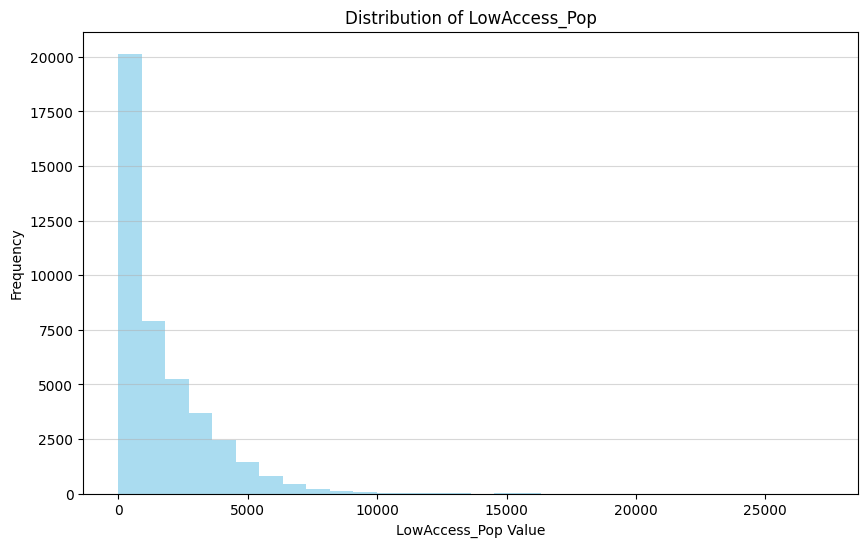

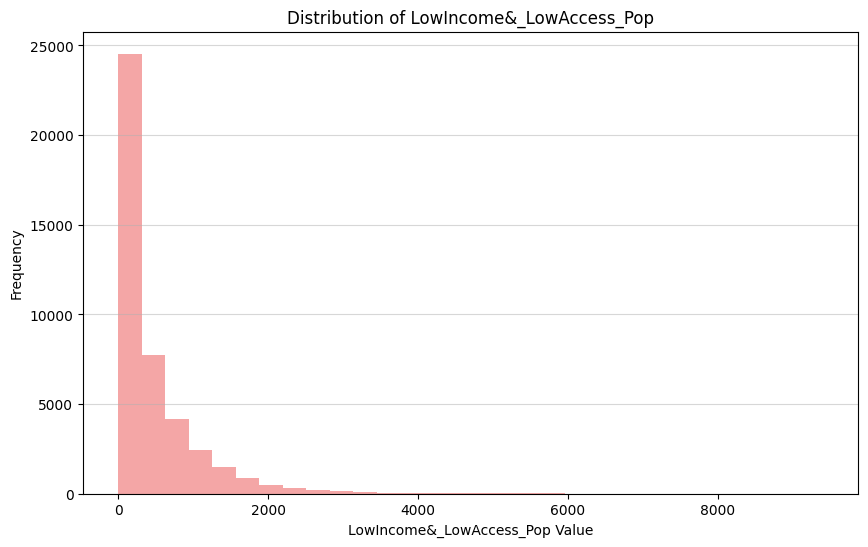

In [66]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(10, 6))
plt.hist(FARA3['LowAccess_Pop'].dropna(), bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of LowAccess_Pop')
plt.xlabel('LowAccess_Pop Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(FARA3['LowIncome&_LowAccess_Pop'].dropna(), bins=30, alpha=0.7, color='lightcoral')
plt.title('Distribution of LowIncome&_LowAccess_Pop')
plt.xlabel('LowIncome&_LowAccess_Pop Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

### Impute median 

In [67]:
import pandas as pd
import warnings

# Suppress warnings in this cell only
warnings.simplefilter("ignore", category=RuntimeWarning)

#  imputation loop
columns_to_impute = ['LowAccess_Pop', 'LowIncome&_LowAccess_Pop', 
                     'LowIncome_Pop', 'NoVehicle_HHs', 'SNAP_HHs','Poverty_Rate']

def impute_median_by_group(df, col_name):
    df[col_name] = df.groupby(['State', 'County', 'Urban_Status'])[col_name] \
                     .transform(lambda x: x.fillna(x.median()))
    return df

for col in columns_to_impute:
    # Step 1: Impute within groups
    impute_median_by_group(FARA3, col)
    
    # Step 2: Fill any remaining NaNs with global median
    global_median = FARA3[col].median()
    FARA3[col] = FARA3[col].fillna(global_median)

In [68]:
FARA3

,Tract_ID,State,County,Urban_Status,Is_Food_Desert,Total_Population,LowAccess_Pop,LowIncome&_LowAccess_Pop,LowIncome_Pop,NoVehicle_HHs,SNAP_HHs,Poverty_Rate,Median_Income
0,1001020100,Alabama,Autauga County,1,0,1912,1896.0,461.0,455.0,6.0,102.0,11.3,81250.0
1,1001020200,Alabama,Autauga County,1,1,2170,1261.0,604.0,802.0,89.0,156.0,17.9,49000.0
2,1001020300,Alabama,Autauga County,1,0,3373,1552.0,478.0,1306.0,99.0,172.0,15.0,62609.0
3,1001020400,Alabama,Autauga County,1,0,4386,1363.0,343.0,922.0,21.0,98.0,2.8,70607.0
4,1001020500,Alabama,Autauga County,1,0,10766,2643.0,586.0,2242.0,230.0,339.0,15.2,96334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,0,3326,902.0,218.0,765.0,61.0,64.0,9.7,67254.0
72527,56043000301,Wyoming,Washakie County,1,0,2665,155.0,44.0,774.0,88.0,41.0,11.6,64152.0
72528,56043000302,Wyoming,Washakie County,1,0,2542,155.0,44.0,789.0,23.0,64.0,16.3,69605.0
72529,56045951100,Wyoming,Weston County,0,0,3314,840.0,247.0,955.0,47.0,34.0,17.5,74500.0


Right Skew: Both distributions exhibit a clear right skew. The majority of the data points are concentrated at the lower values, with a long tail extending towards higher values. This indicates that there are many census tracts with relatively low numbers of people with low access (both overall and low-income), but a smaller number of tracts with very high numbers.

### Impute  Mean for median income since it seems normal 

In [69]:
import pandas as pd
import warnings

# Suppress warnings in this cell only
warnings.simplefilter("ignore", category=RuntimeWarning)

#  imputation loop
columns_to_impute = ["Median_Income"]

def impute_mean_by_group(df, col_name):
    df[col_name] = df.groupby(['State', 'County', 'Urban_Status'])[col_name] \
                     .transform(lambda x: x.fillna(x.mean()))
    return df

for col in columns_to_impute:
    # Step 1: Impute within groups
    impute_mean_by_group(FARA3, col)
    
    # Step 2: Fill any remaining NaNs with global mean
    global_mean = FARA3[col].mean()
    FARA3[col] = FARA3[col].fillna(global_mean)

In [70]:
FARA3.columns


Index(['Tract_ID', 'State', 'County', 'Urban_Status', 'Is_Food_Desert',
       'Total_Population', 'LowAccess_Pop', 'LowIncome&_LowAccess_Pop',
       'LowIncome_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate',
       'Median_Income'],
      dtype='object')

### Calculate Ratios

"LowAccess_Ratio": "Proportion of tract population with poor food access", 

"LowIncome&_LowAccess_Ratio": "Proportion of LOW-INCOME population with poor food access", 

"Pct_LowIncome": "Percentage of tract population that is low-income", 
Low income and low access  = LILA = LI +LA  subset of low access pop,   have low access but u r also low income
r'
df["Pct_LowIncome"] = df["LowIncome_Pop"] / df["Total_Population"]
df["NoVehicle_Ratio"] = df["NoVehicle_HHs"] / df["Total_Population"]
df["SNAP_Participation_Rate"] = df["SNAP_HHs"] / df["Total_Population"]

    "LAPOP1_10": "LowAccess_Pop",
    "LALOWI1_10": "LowIncome&_LowAccess_Pop", is part of the grand total of LowAccess
    "TractLOWI": "LowIncome_Pop", Total low income ppl
    "TractHUNV": "NoVehicle_HHs",
    "TractSNAP": "SNAP_HHs",
'
TractHUNV	Tract housing units without a vehicle, number	Total count of housing units without a vehicle in tract 
TractSNAP	Tract housing units receiving SNAP benefits, number	Total count of housing units receiving SNAP benefits in tract 

In [71]:
FARA3["LowAccess_Ratio"] = FARA3["LowAccess_Pop"] / FARA3["Total_Population"]
FARA3["LowIncome&_LowAccess_Ratio"] = FARA3["LowIncome&_LowAccess_Pop"] / FARA3["LowIncome_Pop"]
FARA3["Pct_LowIncome_"] = FARA3["LowIncome_Pop"] / FARA3["Total_Population"]
FARA3["NoVehicle_HHs_Ratio"] = FARA3["NoVehicle_HHs"] / FARA3["Total_Population"]
FARA3["SNAP_Participatio_Rate"] = FARA3["SNAP_HHs"] / FARA3["Total_Population"]

In [ ]:
# FARA3 =FARA3.drop(columns=["LowAccess_Pop", "LowIncome&_LowAccess_Pop", "LowIncome_Pop"])

In [72]:
print(FARA3.columns, FARA3.shape)

Index(['Tract_ID', 'State', 'County', 'Urban_Status', 'Is_Food_Desert',
       'Total_Population', 'LowAccess_Pop', 'LowIncome&_LowAccess_Pop',
       'LowIncome_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate',
       'Median_Income', 'LowAccess_Ratio', 'LowIncome&_LowAccess_Ratio',
       'Pct_LowIncome_', 'NoVehicle_HHs_Ratio', 'SNAP_Participatio_Rate'],
      dtype='object') (72531, 18)


In [74]:
FARA3= FARA3[['Tract_ID', 'State', 'County', 'Urban_Status', 'Is_Food_Desert',
       'Total_Population', 'LowAccess_Pop','LowIncome_Pop', 'LowIncome&_LowAccess_Pop',
        'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate',
       'Median_Income', 'LowAccess_Ratio', 'LowIncome&_LowAccess_Ratio',
       'Pct_LowIncome_', 'NoVehicle_HHs_Ratio', 'SNAP_Participatio_Rate']]

In [75]:
# Check urban/rural food desert counts
print("\nFood Desert Counts:")
print(pd.crosstab(FARA3["Urban_Status"], FARA3["Is_Food_Desert"]))

# Check missing values
print("\nMissing values per column:")
print(FARA3.isnull().sum())


Food Desert Counts:
Is_Food_Desert      0     1
Urban_Status               
0               16010  1352
1               47228  7941

Missing values per column:
Tract_ID                        0
State                           0
County                          0
Urban_Status                    0
Is_Food_Desert                  0
Total_Population                0
LowAccess_Pop                   0
LowIncome_Pop                   0
LowIncome&_LowAccess_Pop        0
NoVehicle_HHs                   0
SNAP_HHs                        0
Poverty_Rate                    0
Median_Income                   0
LowAccess_Ratio                 0
LowIncome&_LowAccess_Ratio    250
Pct_LowIncome_                  0
NoVehicle_HHs_Ratio             0
SNAP_Participatio_Rate          0
dtype: int64


In [76]:
FARA3

,Tract_ID,State,County,Urban_Status,Is_Food_Desert,Total_Population,LowAccess_Pop,LowIncome_Pop,LowIncome&_LowAccess_Pop,NoVehicle_HHs,SNAP_HHs,Poverty_Rate,Median_Income,LowAccess_Ratio,LowIncome&_LowAccess_Ratio,Pct_LowIncome_,NoVehicle_HHs_Ratio,SNAP_Participatio_Rate
0,1001020100,Alabama,Autauga County,1,0,1912,1896.0,455.0,461.0,6.0,102.0,11.3,81250.0,0.991632,1.013187,0.237971,0.003138,0.053347
1,1001020200,Alabama,Autauga County,1,1,2170,1261.0,802.0,604.0,89.0,156.0,17.9,49000.0,0.581106,0.753117,0.369585,0.041014,0.071889
2,1001020300,Alabama,Autauga County,1,0,3373,1552.0,1306.0,478.0,99.0,172.0,15.0,62609.0,0.460125,0.366003,0.387192,0.029351,0.050993
3,1001020400,Alabama,Autauga County,1,0,4386,1363.0,922.0,343.0,21.0,98.0,2.8,70607.0,0.310762,0.372017,0.210214,0.004788,0.022344
4,1001020500,Alabama,Autauga County,1,0,10766,2643.0,2242.0,586.0,230.0,339.0,15.2,96334.0,0.245495,0.261374,0.208248,0.021364,0.031488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,0,3326,902.0,765.0,218.0,61.0,64.0,9.7,67254.0,0.271197,0.284967,0.230006,0.018340,0.019242
72527,56043000301,Wyoming,Washakie County,1,0,2665,155.0,774.0,44.0,88.0,41.0,11.6,64152.0,0.058161,0.056848,0.290432,0.033021,0.015385
72528,56043000302,Wyoming,Washakie County,1,0,2542,155.0,789.0,44.0,23.0,64.0,16.3,69605.0,0.060976,0.055767,0.310386,0.009048,0.025177
72529,56045951100,Wyoming,Weston County,0,0,3314,840.0,955.0,247.0,47.0,34.0,17.5,74500.0,0.253470,0.258639,0.288171,0.014182,0.010260


### Impute LowIncome&_LowAccess_Ratio using median

In [120]:
FARA3

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,3326,1317,0,57.0,1.71,0,...,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0
72527,56043000301,Wyoming,Washakie County,1,2665,1154,0,10.0,0.38,0,...,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0
72528,56043000302,Wyoming,Washakie County,1,2542,1021,0,73.0,2.87,0,...,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0
72529,56045951100,Wyoming,Weston County,0,3314,1322,0,252.0,7.60,0,...,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0


In [77]:
 # Step 1: Impute within groups
impute_median_by_group(FARA3, "LowIncome&_LowAccess_Ratio")
# Step 2: Fill any remaining NaNs with global median
global_median = FARA3[col].median()
FARA3["LowIncome&_LowAccess_Ratio"] = FARA3["LowIncome&_LowAccess_Ratio"].fillna(global_median)

### Save cleaned version to CSV

In [142]:
FARA3

,Tract_ID,State,County,Urban_Status,Total_Population,Is_Food_Desert,Raw_NoVehicle_HHs,Raw_SNAP_HHs,Poverty_Rate,Median_Income,LowAccess_Ratio,LowIncome_Access_Ratio,Pct_LowIncome_,NoVehicle_HHs_Ratio,SNAP_Participatio_Rate
0,1001020100,Alabama,Autauga County,1,1912,0,6.0,102.0,11.3,81250.0,0.991632,1.013187,0.237971,0.003138,0.053347
1,1001020200,Alabama,Autauga County,1,2170,1,89.0,156.0,17.9,49000.0,0.581106,0.753117,0.369585,0.041014,0.071889
2,1001020300,Alabama,Autauga County,1,3373,0,99.0,172.0,15.0,62609.0,0.460125,0.366003,0.387192,0.029351,0.050993
3,1001020400,Alabama,Autauga County,1,4386,0,21.0,98.0,2.8,70607.0,0.310762,0.372017,0.210214,0.004788,0.022344
4,1001020500,Alabama,Autauga County,1,10766,0,230.0,339.0,15.2,96334.0,0.245495,0.261374,0.208248,0.021364,0.031488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,3326,0,61.0,64.0,9.7,67254.0,0.271197,0.284967,0.230006,0.018340,0.019242
72527,56043000301,Wyoming,Washakie County,1,2665,0,88.0,41.0,11.6,64152.0,0.058161,0.056848,0.290432,0.033021,0.015385
72528,56043000302,Wyoming,Washakie County,1,2542,0,23.0,64.0,16.3,69605.0,0.060976,0.055767,0.310386,0.009048,0.025177
72529,56045951100,Wyoming,Weston County,0,3314,0,47.0,34.0,17.5,74500.0,0.253470,0.258639,0.288171,0.014182,0.010260


In [ ]:
# Save cleaned version to CSV
import pandas as pd
FARA3.to_csv(r"\Data\FARA_raw.csv", index=False)

print("Cleaned dataset saved as 'FARA_raw.csv'")

Cleaned dataset saved as 'FARA_raw.csv'


# CHR

In [ ]:
#CHR = pd.read_csv(r"\Data\CHR_raw.csv")
#CHR

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v033_rawvalue,v033_numerator,v033_denominator,v033_cilow,v033_cihigh,v048_rawvalue,v048_numerator,v048_denominator,v048_cilow,v048_cihigh
0,0,0,0,US,United States,2010,NaN,7261.2,3155908.0,835139971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1000,AL,Alabama,2010,NaN,10150.4,68033.0,12788235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1001,AL,Autauga County,2010,1.0,9778.1,670.0,137881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,1003,AL,Baldwin County,2010,1.0,8221.7,2148.0,449589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,1005,AL,Barbour County,2010,1.0,10686.1,424.0,79450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56,37,56037,WY,Sweetwater County,2010,1.0,8647.2,409.0,107990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3189,56,39,56039,WY,Teton County,2010,1.0,4872.3,121.0,56671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3190,56,41,56041,WY,Uinta County,2010,1.0,8263.6,205.0,56457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3191,56,43,56043,WY,Washakie County,2010,1.0,7212.0,91.0,21224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
state_mapping = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [255]:
# Add  state name to CHR
CHR["State"] = CHR["State_Abbr"].map(state_mapping)

In [256]:
CHR.columns

Index(['statecode', 'countycode', 'fipscode', 'State_Abbr', 'County', 'year',
       'county_ranked', 'v001_rawvalue', 'v001_numerator', 'v001_denominator',
       ...
       'v033_numerator', 'v033_denominator', 'v033_cilow', 'v033_cihigh',
       'v048_rawvalue', 'v048_numerator', 'v048_denominator', 'v048_cilow',
       'v048_cihigh', 'State'],
      dtype='object', length=199)

In [ ]:
CHR = CHR[[
    # Location
    'fipscode', 'State', 'County',
    # Health Outcomes
    'v001_rawvalue', 'v002_rawvalue', 'v037_rawvalue', 
    'v011_rawvalue', 'v007_rawvalue',
    # Food Access
    'v030_rawvalue',
    # Socioeconomic
    'v023_rawvalue', 'v024_rawvalue', 'v044_rawvalue'
]].copy()

In [258]:
CHR.columns = [
    'fipscode', 'State', 'County',
    'premature_death', 'poor_health', 'low_birthweight',
    'obesity', 'diabetes',
    'food_access',
    'unemployment', 'child_poverty', 'income_inequality'
]

In [259]:
CHR.shape

(3193, 12)

In [261]:
CHR

,fipscode,State,County,premature_death,poor_health,low_birthweight,obesity,diabetes,food_access,unemployment,child_poverty,income_inequality
0,0,NaN,United States,7261.2,0.1601,0.0794,0.263,0.7983,0.395673,0.058,0.180,46.5
1,1000,Alabama,Alabama,10150.4,0.2003,0.1011,0.309,0.7759,0.391408,0.050,0.236,47.1
2,1001,Alabama,Autauga County,9778.1,0.2586,0.0883,0.300,0.8149,0.250000,0.046,0.138,40.7
3,1003,Alabama,Baldwin County,8221.7,0.1338,0.0877,0.245,0.7916,0.423077,0.041,0.153,44.5
4,1005,Alabama,Barbour County,10686.1,0.2442,0.1100,0.364,0.7968,0.400000,0.078,0.341,47.4
...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater County,8647.2,0.1392,0.0905,0.287,0.8445,0.166667,0.025,0.090,36.5
3189,56039,Wyoming,Teton County,4872.3,0.0740,0.0766,0.134,0.8793,0.250000,0.026,0.073,52.5
3190,56041,Wyoming,Uinta County,8263.6,0.1555,0.1129,0.296,0.7794,0.285714,0.030,0.122,36.6
3191,56043,Wyoming,Washakie County,7212.0,0.1299,0.0697,0.239,0.7544,0.500000,0.034,0.163,44.6


In [262]:
#Save to CSV
CHR.to_csv("CHR_raw.csv", index=False)

In [ ]:
# DELETE COUNTY US, each state raw using division 
# WHERE state LIKE "%0000"
#CHR = CHR[~CHR["fipscode"].str.contains("000")]

 #Does not work on number only string AttributeError: Can only use .str accessor with string values!
print("dtype: ", CHR["fipscode"].dtype)  # Output: dtype('int64'), dtype('O') (object/string), etc.
# Use math/modulo operatorin stead to Keep only county-level rows (last 3 digits ≠ 000)

CHR = CHR[CHR["fipscode"] % 1000 !=0]
CHR

dtype:  int64


,fipscode,State,County,premature_death,poor_health,low_birthweight,obesity,diabetes,food_access,unemployment,child_poverty,income_inequality
2,1001,Alabama,Autauga County,9778.1,0.2586,0.0883,0.300,0.8149,0.250000,0.046,0.138,40.7
3,1003,Alabama,Baldwin County,8221.7,0.1338,0.0877,0.245,0.7916,0.423077,0.041,0.153,44.5
4,1005,Alabama,Barbour County,10686.1,0.2442,0.1100,0.364,0.7968,0.400000,0.078,0.341,47.4
5,1007,Alabama,Bibb County,13069.5,0.1817,0.0911,0.317,0.7453,0.500000,0.052,0.242,39.8
6,1009,Alabama,Blount County,8929.7,0.2493,0.0726,0.315,0.7686,0.571429,0.041,0.185,41.1
...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater County,8647.2,0.1392,0.0905,0.287,0.8445,0.166667,0.025,0.090,36.5
3189,56039,Wyoming,Teton County,4872.3,0.0740,0.0766,0.134,0.8793,0.250000,0.026,0.073,52.5
3190,56041,Wyoming,Uinta County,8263.6,0.1555,0.1129,0.296,0.7794,0.285714,0.030,0.122,36.6
3191,56043,Wyoming,Washakie County,7212.0,0.1299,0.0697,0.239,0.7544,0.500000,0.034,0.163,44.6


In [ ]:
# Updated dictionary to convert CHR3 county names to FARA3 county names
chr3_to_fara3_mapping = {
    # Alaska
    #'Juneau Borough': 'Juneau City And Borough',
    'Wade Hampton Census Area': 'Kusilvak Census Area',
    #'Wrangell-Petersburg Census Area': 'Petersburg Borough',  # Primary mapping
    #'Prince of Wales-Hyder Census Area': 'Prince of Wales-Outer Ketchikan Census Area',
    #'Sitka Borough': 'Sitka City And Borough',
    #'Yakutat Borough': 'Yakutat City And Borough',
    #'Skagway Municipality':'Skagway-Hoonah-Angoon Census Area',
    # Map FARA's "Wrangell City and Borough" to CHR3's "Petersburg Borough"
    # because Wrangell is often combined with Petersburg in census data
    #'Petersburg Borough': 'Wrangell City and Borough',
    
    # Indiana
    'De Kalb County': 'Dekalb County',
    'La Porte County': 'Laporte County',
    
    # Louisiana
    'La Salle Parish': 'Lasalle Parish',
    
    # New Mexico
    'DeBaca County': 'De Baca County',
    'Dona Ana County': 'Doña Ana County',
    
    # Pennsylvania
    'Mc Kean County': 'Mckean County'
}

# Apply the mapping to CHR3 DataFrame
CHR['County'] = CHR['County'].map(chr3_to_fara3_mapping).fillna(CHR['County'])

In [266]:
CHR

,fipscode,State,County,premature_death,poor_health,low_birthweight,obesity,diabetes,food_access,unemployment,child_poverty,income_inequality
2,1001,Alabama,Autauga County,9778.1,0.2586,0.0883,0.300,0.8149,0.250000,0.046,0.138,40.7
3,1003,Alabama,Baldwin County,8221.7,0.1338,0.0877,0.245,0.7916,0.423077,0.041,0.153,44.5
4,1005,Alabama,Barbour County,10686.1,0.2442,0.1100,0.364,0.7968,0.400000,0.078,0.341,47.4
5,1007,Alabama,Bibb County,13069.5,0.1817,0.0911,0.317,0.7453,0.500000,0.052,0.242,39.8
6,1009,Alabama,Blount County,8929.7,0.2493,0.0726,0.315,0.7686,0.571429,0.041,0.185,41.1
...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater County,8647.2,0.1392,0.0905,0.287,0.8445,0.166667,0.025,0.090,36.5
3189,56039,Wyoming,Teton County,4872.3,0.0740,0.0766,0.134,0.8793,0.250000,0.026,0.073,52.5
3190,56041,Wyoming,Uinta County,8263.6,0.1555,0.1129,0.296,0.7794,0.285714,0.030,0.122,36.6
3191,56043,Wyoming,Washakie County,7212.0,0.1299,0.0697,0.239,0.7544,0.500000,0.034,0.163,44.6


In [ ]:
# Save clean data to CSV
CHR.to_csv(r"Data\CHR.csv", index=False)
FARA3.to_csv(r"Data\FARA3.csv")


In [ ]:
# Load  original CSV files after cleaning
chr_path = r"Data\CHR.csv"  

#Load  data 
import pandas as pd
CHR = pd.read_csv(chr_path)

In [85]:
CHR =CHR.drop(columns={"food_access"})

In [86]:
CHR

,fipscode,State,County,premature_death,poor_health,low_birthweight,obesity,diabetes,unemployment,child_poverty,income_inequality
0,1001,Alabama,Autauga County,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
1,1003,Alabama,Baldwin County,8221.7,0.1338,0.0877,0.245,0.7916,0.041,0.153,44.5
2,1005,Alabama,Barbour County,10686.1,0.2442,0.1100,0.364,0.7968,0.078,0.341,47.4
3,1007,Alabama,Bibb County,13069.5,0.1817,0.0911,0.317,0.7453,0.052,0.242,39.8
4,1009,Alabama,Blount County,8929.7,0.2493,0.0726,0.315,0.7686,0.041,0.185,41.1
...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,Wyoming,Sweetwater County,8647.2,0.1392,0.0905,0.287,0.8445,0.025,0.090,36.5
3139,56039,Wyoming,Teton County,4872.3,0.0740,0.0766,0.134,0.8793,0.026,0.073,52.5
3140,56041,Wyoming,Uinta County,8263.6,0.1555,0.1129,0.296,0.7794,0.030,0.122,36.6
3141,56043,Wyoming,Washakie County,7212.0,0.1299,0.0697,0.239,0.7544,0.034,0.163,44.6


### Imputation using mean 

In [87]:
#get cols
CHR.columns

Index(['fipscode', 'State', 'County', 'premature_death', 'poor_health',
       'low_birthweight', 'obesity', 'diabetes', 'unemployment',
       'child_poverty', 'income_inequality'],
      dtype='object')

In [89]:
import pandas as pd
import warnings

# Suppress warnings in this cell only
warnings.simplefilter("ignore", category=RuntimeWarning)

#  imputation loop
columns_to_impute = ['premature_death', 'poor_health',
       'low_birthweight', 'obesity', 'diabetes', 'unemployment',
       'child_poverty', 'income_inequality']

def impute_mean_by_group(df, col_name):
    df[col_name] = df.groupby(['State', 'County'])[col_name] \
                     .transform(lambda x: x.fillna(x.mean()))
    return df

for col in columns_to_impute:
    # Step 1: Impute within groups
    impute_mean_by_group(CHR, col)
    
    # Step 2: Fill any remaining NaNs with global mean
    global_mean = CHR[col].mean()
    CHR[col] = CHR[col].fillna(global_mean)

In [90]:
CHR

,fipscode,State,County,premature_death,poor_health,low_birthweight,obesity,diabetes,unemployment,child_poverty,income_inequality
0,1001,Alabama,Autauga County,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
1,1003,Alabama,Baldwin County,8221.7,0.1338,0.0877,0.245,0.7916,0.041,0.153,44.5
2,1005,Alabama,Barbour County,10686.1,0.2442,0.1100,0.364,0.7968,0.078,0.341,47.4
3,1007,Alabama,Bibb County,13069.5,0.1817,0.0911,0.317,0.7453,0.052,0.242,39.8
4,1009,Alabama,Blount County,8929.7,0.2493,0.0726,0.315,0.7686,0.041,0.185,41.1
...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,Wyoming,Sweetwater County,8647.2,0.1392,0.0905,0.287,0.8445,0.025,0.090,36.5
3139,56039,Wyoming,Teton County,4872.3,0.0740,0.0766,0.134,0.8793,0.026,0.073,52.5
3140,56041,Wyoming,Uinta County,8263.6,0.1555,0.1129,0.296,0.7794,0.030,0.122,36.6
3141,56043,Wyoming,Washakie County,7212.0,0.1299,0.0697,0.239,0.7544,0.034,0.163,44.6


#### SAVE CLEAN CHR

In [ ]:
CHR.to_csv(r"Data\CHR_without_index.csv", index=False)

In [ ]:
path_noIndex = r"Data\CHR_without_index.csv"
CHR = pd.read_csv(path_noIndex)

In [93]:
CHR.head()

,fipscode,State,County,premature_death,poor_health,low_birthweight,obesity,diabetes,unemployment,child_poverty,income_inequality
0,1001,Alabama,Autauga County,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
1,1003,Alabama,Baldwin County,8221.7,0.1338,0.0877,0.245,0.7916,0.041,0.153,44.5
2,1005,Alabama,Barbour County,10686.1,0.2442,0.1100,0.364,0.7968,0.078,0.341,47.4
3,1007,Alabama,Bibb County,13069.5,0.1817,0.0911,0.317,0.7453,0.052,0.242,39.8
4,1009,Alabama,Blount County,8929.7,0.2493,0.0726,0.315,0.7686,0.041,0.185,41.1


## Save for sql

In [ ]:
# Load  original CSV files (replace paths with  actual files)
chr_path = r"Data\CHR_without_index.csv"  
fara_path = r"Data\FARA_raw.csv"  

#Load raw data FARA
import pandas as pd
FARA3 = pd.read_csv(r"Data\FARA.csv")
# Read CSV files into pandas
CHR5 = pd.read_csv(chr_path)
FARA5 = pd.read_csv(fara_path)
# Connect to SQLite (creates new DB if none exists)

In [150]:
CHR5

,fipscode,State,County,premature_death,poor_health,low_birthweight,obesity,diabetes,food_access,unemployment,child_poverty,income_inequality
0,1001,Alabama,Autauga County,9778.1,0.2586,0.0883,0.300,0.8149,0.250000,0.046,0.138,40.7
1,1003,Alabama,Baldwin County,8221.7,0.1338,0.0877,0.245,0.7916,0.423077,0.041,0.153,44.5
2,1005,Alabama,Barbour County,10686.1,0.2442,0.1100,0.364,0.7968,0.400000,0.078,0.341,47.4
3,1007,Alabama,Bibb County,13069.5,0.1817,0.0911,0.317,0.7453,0.500000,0.052,0.242,39.8
4,1009,Alabama,Blount County,8929.7,0.2493,0.0726,0.315,0.7686,0.571429,0.041,0.185,41.1
...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,Wyoming,Sweetwater County,8647.2,0.1392,0.0905,0.287,0.8445,0.166667,0.025,0.090,36.5
3139,56039,Wyoming,Teton County,4872.3,0.0740,0.0766,0.134,0.8793,0.250000,0.026,0.073,52.5
3140,56041,Wyoming,Uinta County,8263.6,0.1555,0.1129,0.296,0.7794,0.285714,0.030,0.122,36.6
3141,56043,Wyoming,Washakie County,7212.0,0.1299,0.0697,0.239,0.7544,0.500000,0.034,0.163,44.6


In [149]:
FARA5

,Tract_ID,State,County,Urban_Status,Total_Population,Is_Food_Desert,Raw_NoVehicle_HHs,Raw_SNAP_HHs,Poverty_Rate,Median_Income,LowAccess_Ratio,LowIncome_Access_Ratio,Pct_LowIncome_,NoVehicle_HHs_Ratio,SNAP_Participatio_Rate
0,1001020100,Alabama,Autauga County,1,1912,0,6.0,102.0,11.3,81250.0,0.991632,1.013187,0.237971,0.003138,0.053347
1,1001020200,Alabama,Autauga County,1,2170,1,89.0,156.0,17.9,49000.0,0.581106,0.753117,0.369585,0.041014,0.071889
2,1001020300,Alabama,Autauga County,1,3373,0,99.0,172.0,15.0,62609.0,0.460125,0.366003,0.387192,0.029351,0.050993
3,1001020400,Alabama,Autauga County,1,4386,0,21.0,98.0,2.8,70607.0,0.310762,0.372017,0.210214,0.004788,0.022344
4,1001020500,Alabama,Autauga County,1,10766,0,230.0,339.0,15.2,96334.0,0.245495,0.261374,0.208248,0.021364,0.031488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,3326,0,61.0,64.0,9.7,67254.0,0.271197,0.284967,0.230006,0.018340,0.019242
72527,56043000301,Wyoming,Washakie County,1,2665,0,88.0,41.0,11.6,64152.0,0.058161,0.056848,0.290432,0.033021,0.015385
72528,56043000302,Wyoming,Washakie County,1,2542,0,23.0,64.0,16.3,69605.0,0.060976,0.055767,0.310386,0.009048,0.025177
72529,56045951100,Wyoming,Weston County,0,3314,0,47.0,34.0,17.5,74500.0,0.253470,0.258639,0.288171,0.014182,0.010260


In [ ]:
# Load  original CSV files (replace paths with  actual files)
chr_path = r"Data\CHR_without_index.csv"  
fara_path = r"Data\FARA_raw.csv"  

#Load raw data FARA
import pandas as pd

# Read CSV files into pandas
CHR5 = pd.read_csv(chr_path)
FARA5 = pd.read_csv(fara_path)
# Connect to SQLite (creates new DB if none exists)
import sqlite3
import pandas as pd

conn = sqlite3.connect("FARA_fixed9.db")  

# Write DataFrames to SQLite (replace existing tables if any)
CHR5.to_sql("CHR3", conn, if_exists="replace", index=False)
FARA5.to_sql("FARA3", conn, if_exists="replace", index=False)

# Verify SQLite counts
query_chr = pd.read_sql("SELECT COUNT(*) FROM CHR3", conn)
query_fara = pd.read_sql("SELECT COUNT(*) FROM FARA3", conn)
print("SQLite CHR3 count:", query_chr.iloc[0,0])  # Must match 3141
print("SQLite FARA3 count:", query_fara.iloc[0,0])  # Must match 72531

conn.close()  # Save changes

SQLite CHR3 count: 3143
SQLite FARA3 count: 72531


### Bring back after merging in sqlit 

In [ ]:
import pandas as pd
import sqlite3

# Connect to  SQLite database
conn = sqlite3.connect("FARA_fixed9.db")

# Read the merged table into a DataFrame
merged_FD = pd.read_sql("SELECT * FROM exact_matches2", conn)

# Save the DataFrame as a CSV file
merged_FD.to_csv('merged_table.csv', index=False)

# Close the connection
conn.close()

print("Merged table saved as merged_table.csv")

Merged table saved as merged_table.csv


In [97]:
merged_FD.columns

Index(['Tract_ID', 'State', 'County', 'Urban_Status', 'Is_Food_Desert',
       'Total_Population', 'LowAccess_Pop', 'LowIncome_Pop',
       'LowIncome&_LowAccess_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate',
       'Median_Income', 'LowAccess_Ratio', 'LowIncome&_LowAccess_Ratio',
       'Pct_LowIncome_', 'NoVehicle_HHs_Ratio', 'SNAP_Participatio_Rate',
       'fipscode', 'premature_death', 'poor_health', 'low_birthweight',
       'obesity', 'diabetes', 'unemployment', 'child_poverty',
       'income_inequality'],
      dtype='object')

 **Note:**
 get an error if   to select multiple columns from pandas DataFrame. When  provide a tuple of strings (like ['CensusTract', 'fipscode', ...]) directly within the square brackets [] of a DataFrame, pandas interprets it as trying to select a single column with that exact tuple as its name, which doesn't exist in  DataFrame.
The correct way to select multiple columns by name in pandas is to pass a list of the column names within the square brackets.

In [ ]:
merged_FD = merged_FD[[
 
    'Tract_ID',          
    'fipscode',          
    'State',             
    'County',            
    
    'Urban_Status',      


    'Is_Food_Desert',     
    
    'Total_Population',  
    
    'LowAccess_Pop',     
    'LowIncome_Pop',      
    'LowIncome&_LowAccess_Pop', 
    

    'NoVehicle_HHs',     
    'SNAP_HHs',          

   
    'Poverty_Rate',       
    'Median_Income',      
    
    'LowAccess_Ratio',            
    'LowIncome&_LowAccess_Ratio', 
    'Pct_LowIncome_',            
    
    'NoVehicle_HHs_Ratio',      
    'SNAP_Participatio_Rate',     

   
    'premature_death',    
    'poor_health',        
    'low_birthweight',    
    'obesity',            
    'diabetes',          

    
    'unemployment',      
    'child_poverty',      
    'income_inequality'   
]]

In [99]:
merged_FD.columns

Index(['Tract_ID', 'fipscode', 'State', 'County', 'Urban_Status',
       'Is_Food_Desert', 'Total_Population', 'LowAccess_Pop', 'LowIncome_Pop',
       'LowIncome&_LowAccess_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate',
       'Median_Income', 'LowAccess_Ratio', 'LowIncome&_LowAccess_Ratio',
       'Pct_LowIncome_', 'NoVehicle_HHs_Ratio', 'SNAP_Participatio_Rate',
       'premature_death', 'poor_health', 'low_birthweight', 'obesity',
       'diabetes', 'unemployment', 'child_poverty', 'income_inequality'],
      dtype='object')

In [100]:
merged_FD

,Tract_ID,fipscode,State,County,Urban_Status,Is_Food_Desert,Total_Population,LowAccess_Pop,LowIncome_Pop,LowIncome&_LowAccess_Pop,...,NoVehicle_HHs_Ratio,SNAP_Participatio_Rate,premature_death,poor_health,low_birthweight,obesity,diabetes,unemployment,child_poverty,income_inequality
0,1001020100,1001,Alabama,Autauga County,1,0,1912,1896.0,455.0,461.0,...,0.003138,0.053347,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
1,1001020200,1001,Alabama,Autauga County,1,1,2170,1261.0,802.0,604.0,...,0.041014,0.071889,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
2,1001020300,1001,Alabama,Autauga County,1,0,3373,1552.0,1306.0,478.0,...,0.029351,0.050993,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
3,1001020400,1001,Alabama,Autauga County,1,0,4386,1363.0,922.0,343.0,...,0.004788,0.022344,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
4,1001020500,1001,Alabama,Autauga County,1,0,10766,2643.0,2242.0,586.0,...,0.021364,0.031488,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,56043,Wyoming,Washakie County,0,0,3326,902.0,765.0,218.0,...,0.018340,0.019242,7212.0,0.1299,0.0697,0.239,0.7544,0.034,0.163,44.6
72527,56043000301,56043,Wyoming,Washakie County,1,0,2665,155.0,774.0,44.0,...,0.033021,0.015385,7212.0,0.1299,0.0697,0.239,0.7544,0.034,0.163,44.6
72528,56043000302,56043,Wyoming,Washakie County,1,0,2542,155.0,789.0,44.0,...,0.009048,0.025177,7212.0,0.1299,0.0697,0.239,0.7544,0.034,0.163,44.6
72529,56045951100,56045,Wyoming,Weston County,0,0,3314,840.0,955.0,247.0,...,0.014182,0.010260,8244.2,0.1550,0.0941,0.293,0.6727,0.034,0.116,42.5


#FINALLY CLEAN DATA, at last

In [ ]:
# Save the DataFrame as a CSV file
merged_FD.to_csv(r'Data\merged_table.csv', index=False)

# Cleanin back again 

In [102]:
import pandas as pd
FD = pd.read_csv("merged_table.csv")

In [103]:
FD.columns

Index(['Tract_ID', 'fipscode', 'State', 'County', 'Urban_Status',
       'Is_Food_Desert', 'Total_Population', 'LowAccess_Pop', 'LowIncome_Pop',
       'LowIncome&_LowAccess_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate',
       'Median_Income', 'LowAccess_Ratio', 'LowIncome&_LowAccess_Ratio',
       'Pct_LowIncome_', 'NoVehicle_HHs_Ratio', 'SNAP_Participatio_Rate',
       'premature_death', 'poor_health', 'low_birthweight', 'obesity',
       'diabetes', 'unemployment', 'child_poverty', 'income_inequality'],
      dtype='object')

### Map 0 and 1 to Categories

In [104]:
FD["Urban_Status"] = FD["Urban_Status"].map({0: "Rural", 1: "Urban"})
FD["Urban_Status"]

0        Urban
1        Urban
2        Urban
3        Urban
4        Urban
         ...  
72526    Rural
72527    Urban
72528    Urban
72529    Rural
72530    Urban
Name: Urban_Status, Length: 72531, dtype: object

In [105]:
FD["Urban_Status"] = FD["Urban_Status"].astype("category")

In [106]:
FD.columns

Index(['Tract_ID', 'fipscode', 'State', 'County', 'Urban_Status',
       'Is_Food_Desert', 'Total_Population', 'LowAccess_Pop', 'LowIncome_Pop',
       'LowIncome&_LowAccess_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate',
       'Median_Income', 'LowAccess_Ratio', 'LowIncome&_LowAccess_Ratio',
       'Pct_LowIncome_', 'NoVehicle_HHs_Ratio', 'SNAP_Participatio_Rate',
       'premature_death', 'poor_health', 'low_birthweight', 'obesity',
       'diabetes', 'unemployment', 'child_poverty', 'income_inequality'],
      dtype='object')

In [181]:
FD

,Tract_ID,fipscode,State,County,Urban_Status,Total_Population,Is_Food_Desert,Raw_NoVehicle_HHs,Raw_SNAP_HHs,Poverty_Rate,...,fipscode.1,premature_death,poor_health,low_birthweight,obesity,diabetes,food_access,unemployment,child_poverty,income_inequality
0,1001020100,1001,Alabama,Autauga County,Urban,1912,0,6.0,102.0,11.3,...,1001,9778.1,0.2586,0.0883,0.300,0.8149,0.25,0.046,0.138,40.7
1,1001020200,1001,Alabama,Autauga County,Urban,2170,1,89.0,156.0,17.9,...,1001,9778.1,0.2586,0.0883,0.300,0.8149,0.25,0.046,0.138,40.7
2,1001020300,1001,Alabama,Autauga County,Urban,3373,0,99.0,172.0,15.0,...,1001,9778.1,0.2586,0.0883,0.300,0.8149,0.25,0.046,0.138,40.7
3,1001020400,1001,Alabama,Autauga County,Urban,4386,0,21.0,98.0,2.8,...,1001,9778.1,0.2586,0.0883,0.300,0.8149,0.25,0.046,0.138,40.7
4,1001020500,1001,Alabama,Autauga County,Urban,10766,0,230.0,339.0,15.2,...,1001,9778.1,0.2586,0.0883,0.300,0.8149,0.25,0.046,0.138,40.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,56043,Wyoming,Washakie County,Rural,3326,0,61.0,64.0,9.7,...,56043,7212.0,0.1299,0.0697,0.239,0.7544,0.50,0.034,0.163,44.6
72527,56043000301,56043,Wyoming,Washakie County,Urban,2665,0,88.0,41.0,11.6,...,56043,7212.0,0.1299,0.0697,0.239,0.7544,0.50,0.034,0.163,44.6
72528,56043000302,56043,Wyoming,Washakie County,Urban,2542,0,23.0,64.0,16.3,...,56043,7212.0,0.1299,0.0697,0.239,0.7544,0.50,0.034,0.163,44.6
72529,56045951100,56045,Wyoming,Weston County,Rural,3314,0,47.0,34.0,17.5,...,56045,8244.2,0.1550,0.0941,0.293,0.6727,0.50,0.034,0.116,42.5


In [107]:
FD["Is_Food_Desert"] = FD["Is_Food_Desert"].map({0: "NO", 1: "YES"})

In [108]:
FD["Is_Food_Desert"] = FD["Is_Food_Desert"].astype("category")

In [110]:
FD = FD.rename(columns={"Is_Food_Desert":"LowAccess_FoodArea"})

#### LowAccess_FoodArea to LowFoodAccess AKA desert 

In [ ]:
FD = FD.rename(columns={"LowAccess_FoodArea":"LowFoodAccess"})

In [111]:
FD

,Tract_ID,fipscode,State,County,Urban_Status,LowAccess_FoodArea,Total_Population,LowAccess_Pop,LowIncome_Pop,LowIncome&_LowAccess_Pop,...,NoVehicle_HHs_Ratio,SNAP_Participatio_Rate,premature_death,poor_health,low_birthweight,obesity,diabetes,unemployment,child_poverty,income_inequality
0,1001020100,1001,Alabama,Autauga County,Urban,NO,1912,1896.0,455.0,461.0,...,0.003138,0.053347,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
1,1001020200,1001,Alabama,Autauga County,Urban,YES,2170,1261.0,802.0,604.0,...,0.041014,0.071889,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
2,1001020300,1001,Alabama,Autauga County,Urban,NO,3373,1552.0,1306.0,478.0,...,0.029351,0.050993,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
3,1001020400,1001,Alabama,Autauga County,Urban,NO,4386,1363.0,922.0,343.0,...,0.004788,0.022344,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
4,1001020500,1001,Alabama,Autauga County,Urban,NO,10766,2643.0,2242.0,586.0,...,0.021364,0.031488,9778.1,0.2586,0.0883,0.300,0.8149,0.046,0.138,40.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,56043,Wyoming,Washakie County,Rural,NO,3326,902.0,765.0,218.0,...,0.018340,0.019242,7212.0,0.1299,0.0697,0.239,0.7544,0.034,0.163,44.6
72527,56043000301,56043,Wyoming,Washakie County,Urban,NO,2665,155.0,774.0,44.0,...,0.033021,0.015385,7212.0,0.1299,0.0697,0.239,0.7544,0.034,0.163,44.6
72528,56043000302,56043,Wyoming,Washakie County,Urban,NO,2542,155.0,789.0,44.0,...,0.009048,0.025177,7212.0,0.1299,0.0697,0.239,0.7544,0.034,0.163,44.6
72529,56045951100,56045,Wyoming,Weston County,Rural,NO,3314,840.0,955.0,247.0,...,0.014182,0.010260,8244.2,0.1550,0.0941,0.293,0.6727,0.034,0.116,42.5


### Convert to Categorical Data Type-Maybe 


In [128]:
FD.columns

Index(['Tract_ID', 'fipscode', 'State', 'County', 'Urban_Status',
       'LowFoodAccess', 'Total_Population', 'LowAccess_Pop', 'LowIncome_Pop',
       'LowIncome&_LowAccess_Pop', 'NoVehicle_HHs', 'SNAP_HHs', 'Poverty_Rate',
       'Median_Income', 'LowAccess_Ratio', 'LowIncome&_LowAccess_Ratio',
       'Pct_LowIncome_', 'NoVehicle_HHs_Ratio', 'SNAP_Participatio_Rate',
       'premature_death', 'poor_health', 'low_birthweight', 'obesity',
       'diabetes', 'unemployment', 'child_poverty', 'income_inequality'],
      dtype='object')

In [113]:
print(FD.dtypes)  # Check data types

Tract_ID                         int64
fipscode                         int64
State                           object
County                          object
Urban_Status                  category
LowAccess_FoodArea            category
Total_Population                 int64
LowAccess_Pop                  float64
LowIncome_Pop                  float64
LowIncome&_LowAccess_Pop       float64
NoVehicle_HHs                  float64
SNAP_HHs                       float64
Poverty_Rate                   float64
Median_Income                  float64
LowAccess_Ratio                float64
LowIncome&_LowAccess_Ratio     float64
Pct_LowIncome_                 float64
NoVehicle_HHs_Ratio            float64
SNAP_Participatio_Rate         float64
premature_death                float64
poor_health                    float64
low_birthweight                float64
obesity                        float64
diabetes                       float64
unemployment                   float64
child_poverty            

In [114]:
print(FD.head())

     Tract_ID  fipscode    State          County Urban_Status  \
0  1001020100      1001  Alabama  Autauga County        Urban   
1  1001020200      1001  Alabama  Autauga County        Urban   
2  1001020300      1001  Alabama  Autauga County        Urban   
3  1001020400      1001  Alabama  Autauga County        Urban   
4  1001020500      1001  Alabama  Autauga County        Urban   

  LowAccess_FoodArea  Total_Population  LowAccess_Pop  LowIncome_Pop  \
0                 NO              1912         1896.0          455.0   
1                YES              2170         1261.0          802.0   
2                 NO              3373         1552.0         1306.0   
3                 NO              4386         1363.0          922.0   
4                 NO             10766         2643.0         2242.0   

   LowIncome&_LowAccess_Pop  ...  NoVehicle_HHs_Ratio  SNAP_Participatio_Rate  \
0                     461.0  ...             0.003138                0.053347   
1             

In [115]:
print((FD['LowAccess_Pop'] % 1 != 0).sum())  # Shows how many rows have decimals

8634


In [116]:
print((FD['LowAccess_Pop'] % 1 != 0).sum())

8634


In [ ]:
#FD["Total_Population"] = FD["Total_Population"].astype("float")
#FD["Num_Occupied_Housing_Units"] = FD["Num_Occupied_Housing_Units"].astype("float")

In [117]:
print(FD.dtypes)  # Check data types

Tract_ID                         int64
fipscode                         int64
State                           object
County                          object
Urban_Status                  category
LowAccess_FoodArea            category
Total_Population                 int64
LowAccess_Pop                  float64
LowIncome_Pop                  float64
LowIncome&_LowAccess_Pop       float64
NoVehicle_HHs                  float64
SNAP_HHs                       float64
Poverty_Rate                   float64
Median_Income                  float64
LowAccess_Ratio                float64
LowIncome&_LowAccess_Ratio     float64
Pct_LowIncome_                 float64
NoVehicle_HHs_Ratio            float64
SNAP_Participatio_Rate         float64
premature_death                float64
poor_health                    float64
low_birthweight                float64
obesity                        float64
diabetes                       float64
unemployment                   float64
child_poverty            

3,142 counties
There are 3,142 counties and county-equivalents in the United States, including Alaska, which has 19 organized boroughs and 1 unorganized borough

#### Save the cleaned DataFrame as a CSV file

In [ ]:
# Save the cleaned DataFrame as a CSV file
FD.to_csv(r'Data\FD3.csv', index=False)

In [143]:
print(FD.head())

   CensusTract  fipscode    State          County Urban_Status  \
0   1001020100      1001  Alabama  Autauga County        Urban   
1   1001020200      1001  Alabama  Autauga County        Urban   
2   1001020300      1001  Alabama  Autauga County        Urban   
3   1001020400      1001  Alabama  Autauga County        Urban   
4   1001020500      1001  Alabama  Autauga County        Urban   

   Total_Population  Num_Occupied_Housing_Units  Group_Quarters_Population  \
0            1912.0                       693.0                        0.0   
1            2170.0                       743.0                      181.0   
2            3373.0                      1256.0                        0.0   
3            4386.0                      1722.0                        0.0   
4           10766.0                      4082.0                      181.0   

  Food_Desert_1mile Low_Vehicle_Access  ...  SNAP_Households  premature_death  \
0               Yes                Yes  ...          